In [2]:
# Data organizer
import numpy as np
import pandas as pd
import tidytcells as tt 
import pickle
import Levenshtein
import matplotlib.pyplot as plt
import random

In [3]:
def Self_Pairs(out,d):
    pairs = []
    for k, seqs in enumerate(out):
        N = len(seqs)
        for i in range(N-1):
            p1 = seqs[i]
            for j in range(i+1,N):
                p2 = seqs[j]
                if p1[1] == p2[1]:
                    d2 = Levenshtein.distance(p1[0],p2[0]) 
                    if d2 == d:
                        pairs.append([k,p1[0],p1[1],p2[0],p2[1],d])
    return pairs
def Cross_Pairs(out,d):
    out_trim = out
    N = len(out_trim)
    pairs = []
    for i in range(N):
        seqs1 = out_trim[i]
        for j in range(i+1,N): # not counting self-pairs
            seqs2 = out_trim[j]
            for s1 in seqs1:
                for s2 in seqs2:
                    if s1[1] == s2[1]:
                        d2 = Levenshtein.distance(s1[0],s2[0])
                        if d2 == d:
                            pairs.append(['c',s1[0],s1[1],s2[0],s2[1],d])
    return pairs

In [4]:
filepath = 'seqs/'
filename ='VDJdb_data_090624'
data = pd.read_csv(filepath + filename + '.tsv',sep='\t')
data = data[data['Gene'] == 'TRB']

Text(0, 0.5, 'PDF')

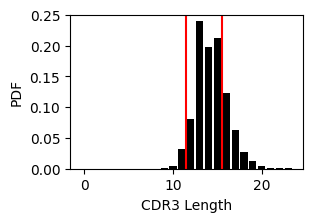

In [5]:
Epi = list(data['Epitope'])
Seqs = list(data['CDR3'])
Vgene = list(data['V'])

Epi_set = list(set(Epi))

out_sort = []
for erp in Epi_set:
    temp = []
    for i in range(len(Seqs)):
        if Epi[i] == erp:# and len(Seqs[i]) >= 11 and len(Seqs[i]) <= 15:
            temp.append((Seqs[i], Vgene[i]))
    out_sort.append(temp)
L_CDR3 = []
for i, x in enumerate(out_sort):
    temp = [len(y[0]) for y in x]
    L_CDR3.append(temp)
    h, _ = np.histogram(temp,bins=list(range(25)))
    if i == 0:
        h_all = h
    if i != 0:
        h_all = h_all + h
plt.figure(figsize=(3,2))
plt.bar(list(range(24)),h_all/np.sum(h_all),color='k')
plt.plot([11.5,11.5],[0,0.25],'r-')
plt.plot([15.5,15.5],[0,0.25],'r-')
plt.ylim([0,0.25])
plt.xlabel('CDR3 Length')
plt.ylabel('PDF')

In [139]:
############

In [8]:
MMR = 15
Rep = 15
for r in range(Rep):
    out_sort_temp = [random.sample(x, min([len(x), MMR])) for x in out_sort]
    for d in range(1,7):
        Spairs =  Self_Pairs(out_sort_temp,d)
        ep = [a[0] for a in Spairs]
        s1 = [a[1] for a in Spairs]
        s2 = [a[3] for a in Spairs]
        g1 = [a[2] for a in Spairs]
        g2 = [a[4] for a in Spairs]
        LD = [a[5] for a in Spairs]
        dict = {'epitope': ep, 'Seq1': s1, 'Seq2': s2, 'Vgene1': g1, 'Vgene2': g2, 'Levenshtein Distance': LD}
        df = pd.DataFrame(dict)
        df.to_csv('seqs/VDJPairs_test_LD_'+ str(d) + '_'+ str(r) + '.csv')
        ###################################
        Cpairs =  Cross_Pairs(out_sort_temp,d)
        ep = [a[0] for a in Cpairs]
        s1 = [a[1] for a in Cpairs]
        s2 = [a[3] for a in Cpairs]
        g1 = [a[2] for a in Cpairs]
        g2 = [a[4] for a in Cpairs]
        LD = [a[5] for a in Cpairs]
        dict = {'epitope': ep, 'Seq1': s1, 'Seq2': s2, 'Vgene1': g1, 'Vgene2': g2, 'Levenshtein Distance': LD}
        df = pd.DataFrame(dict)
        df.to_csv('seqs/Bkg_VDJPairs_test_LD_'+ str(d) + '_'+ str(r) + '.csv')
        print('d = ' + str(d) + ' # self-pairs = ' + str(len(Spairs)) + ' # cross-pairs = ' + str(len(Cpairs)))

d = 1 # self-pairs = 252 # cross-pairs = 73
